## Building Simple Linear Regression model

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
df = pd.read_csv("D:\home_price.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


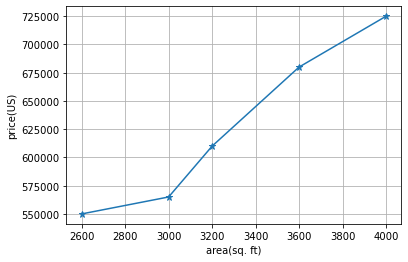

In [32]:
#plotting graph AREA vs PRICE
%matplotlib inline
plt.xlabel('area(sq. ft)')
plt.ylabel('price(US)')
plt.plot(df.area, df.price, marker='*', markersize = 7,)
plt.grid()

In [41]:
model = linear_model.LinearRegression()
model.fit(df[['area']],df.price)

LinearRegression()

In [48]:
model.predict([[3300]])

array([628715.75342466])

In [49]:
model.coef_

array([135.78767123])

In [50]:
model.intercept_

180616.43835616432

In [62]:
model.score(df[['area']],df.price)

0.9584301138199486

In [99]:
d = pd.read_csv("D:\home_price.csv", "sheet2", engine = 'python' ) # we used engine = python to avoid warning
d

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [100]:
p = model.predict(d)
d['price'] = p
d

,area,price
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [112]:
d.to_csv('D:\perediction.csv', index =False)

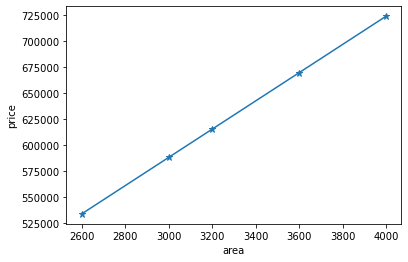

In [115]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.plot(df.area,model.predict(df[['area']]), marker = '*', markersize = 7)

# Predicting Canada per capita through linear regression


In [134]:
df1 = pd.read_csv('D:\per_capita.csv')
df1

,year,capita_income
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


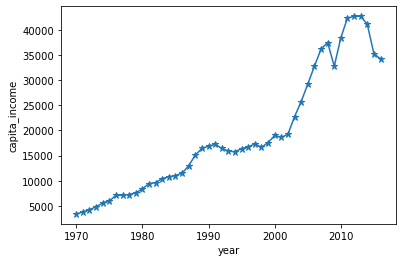

In [136]:
%matplotlib inline
plt.xlabel('year')
plt.ylabel('capita_income')
plt.plot(df1.year,df1.capita_income, marker = "*", markersize = 7)

In [140]:
reg = linear_model.LinearRegression()
reg.fit(df1[['year']],df1.capita_income)

LinearRegression()

In [148]:
reg.predict([[2020]])

array([41288.69409442])

In [152]:
reg.score(df1[['year']],df1.capita_income)

0.890916917957032

In [158]:
df1['capita_income'].describe()

count       47.000000
mean     18920.137063
std      12034.679438
min       3399.299037
25%       9526.914515
50%      16426.725480
75%      27458.601420
max      42676.468370
Name: capita_income, dtype: float64

In [160]:
df1.describe()

,year,capita_income
count,47.000000,47.000000
mean,1993.000000,18920.137063
std,13.711309,12034.679438
min,1970.000000,3399.299037
25%,1981.500000,9526.914515
50%,1993.000000,16426.725480
75%,2004.500000,27458.601420
max,2016.000000,42676.468370


## Linear regression multivariate

In [170]:
a =pd.read_csv('D:\lin_multi.csv')
a

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [175]:
a.bedrooms.median() #
#import math
#median_bedrooms = math.floor(a.bedrooms.median())
#median_bedrooms

4.0

In [176]:
a.bedrooms = a.bedrooms.fillna(a.bedrooms.median())
a.bedrooms

0    3.0
1    4.0
2    4.0
3    3.0
4    5.0
5    6.0
Name: bedrooms, dtype: float64

In [178]:
m = linear_model.LinearRegression()
m.fit(a[['area','bedrooms','age']], a.price)

LinearRegression()

In [180]:
m.predict([[3000,3,40]])

array([498408.25158031])

In [188]:
m.score(a[['area','bedrooms','age']],a.price)

0.9550196399325819

# Gradient Descent

In [250]:
# how Gradient decent
import numpy as np
import matplotlib.pyplot as plt

In [251]:
%matplotlib inline
def gradient_descent(x,y):
    m_curr = b_curr = 0
    rate = 0.01
    n = len(x)
    plt.scatter(x,y,color='red',marker='+',linewidth='5')
    for i in range(10000):
        y_predicted = m_curr * x + b_curr
#         print (m_curr,b_curr, i)
        plt.plot(x,y_predicted,color='green')
        md = -(2/n)*sum(x*(y-y_predicted))
        yd = -(2/n)*sum(y-y_predicted)
        m_curr = m_curr - rate * md
        b_curr = b_curr - rate * yd

In [252]:
x = np.array([1,2,3,4,5])
y = np.array([5,7,9,11,13])

time took 11.742451190948486


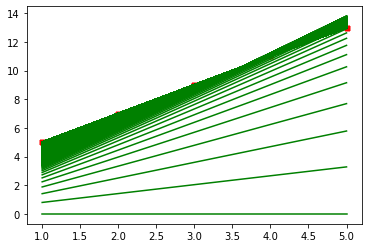

In [256]:
import time
import sys
start = time.time()
gradient_descent(x,y)
print("time took", (time.time()-start))